In [490]:
import numpy as np
import pandas as pd    
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [491]:
data = pd.read_csv('TSLA.csv', header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date', encoding=None)
print(data)

                 Close
Date                  
2014-11-25  248.089996
2014-11-26  248.440002
2014-11-28  244.520004
2014-12-01  231.639999
2014-12-02  231.429993
...                ...
2019-11-19  359.519989
2019-11-20  352.220001
2019-11-21  354.829987
2019-11-22  333.040009
2019-11-25  336.339996

[1259 rows x 1 columns]


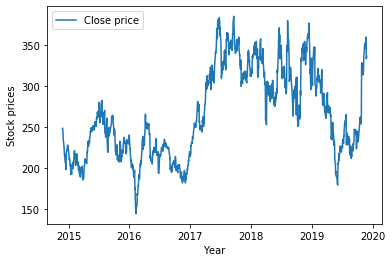

In [492]:
plt.plot(data['Close'], label='Close price')
plt.xlabel('Year')
plt.ylabel('Stock prices')
plt.legend(loc='upper left')
plt.show()


In [493]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [494]:
train_length = int(len(scaled_data) * 0.7)
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]
test_length = len(scaled_data) - train_length


In [495]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    itr = 0
    leng = len(dataset) - timestep - 1
    while itr < leng:
        data_x.append(dataset[itr:(itr+timestep),0])
        data_y.append(dataset[itr +timestep,0])
        itr += 1
    return np.array(data_x), np.array(data_y)


In [496]:
timestep = 1
test_x, test_y = create_dataset(test_data, timestep)
train_x, train_y = create_dataset(train_data, timestep)


In [497]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(879, 1)
(879,)
(376, 1)
(376,)


In [498]:
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))


In [499]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'], target_tensors=None)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [500]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=1)
print('Keras model accuracy = ', score[1])
print('Keras model loss = ', score[0])


Epoch 1/1
879/879 [==============================] - 4s 5ms/step
Keras model accuracy =  0.0022753128555176336
Keras model loss =  0.0009339183110180094


In [501]:
test_predictions = model.predict(test_x)
#print (test_predictions)

In [502]:
train_predictions = model.predict(train_x)
#print (train_predictions)

In [503]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


In [504]:
train_y = scaler.inverse_transform([train_y])
test_y = scaler.inverse_transform([test_y])


In [505]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions


In [506]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2+1:len(scaled_data)-1, :] = test_predictions


In [507]:
inversed_scaled_data = scaler.inverse_transform(scaled_data)


In [508]:
counter = 0
accurate = 0

for i in range(len(test_predict_plot)):
    if(np.isnan(test_predict_plot[i][0]) == False):
        counter += 1
        if(test_predict_plot[i][0] <= inversed_scaled_data[i][0]*1.05 and test_predict_plot[i][0] >= inversed_scaled_data[i][0]*.95):
            accurate += 1
accuracy_nn = (accurate/counter)*(100) 
print (accuracy_nn)


86.70212765957447


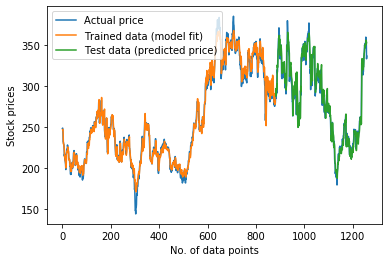

In [509]:
plt.plot(inversed_scaled_data, label='Actual price')
plt.plot(train_predict_plot, label='Trained data (model fit)')
plt.plot(test_predict_plot, label='Test data (predicted price)')
plt.xlabel('No. of data points')
plt.ylabel('Stock prices')
plt.legend(loc='upper left')
plt.show()